In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import optiland.backend as be  # backend for numerical operations - either numpy or torch
from Simulator.Optical_System.Optical_Sys import OpticalSystem
from Simulator.utils import *

d:\py\Anaconda3\envs\DiffOptics\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
d:\py\Anaconda3\envs\DiffOptics\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type ali

In [ ]:
be.set_backend("torch")  # all calculations will be done using torch
be.set_precision("float32")  # or "float64" for double precision
be.grad_mode.enable()  # enable gradient calculation. Can also be set to "disable" to save memory if gradients are not needed.
be.set_device("cuda")  # run on 'cuda' if available, otherwise use "cpu" option

In [4]:
# -------------------------------
# Basic Optical System Parameters
# -------------------------------
beam_size = 1.0                   # Beam diameter (mm)
wavelength = 0.78                 # Wavelength (μm or mm, depending on system units)
mirror_aperture = [12.7, 0.0]     # Mirror aperture [X, Y]
pinhole_aperture = [1.0, 0.0]     # Pinhole aperture [X, Y]
detector_aperture = [25.0, 25.0]  # Detector aperture [X, Y]
detector_surface1 = 5
detector_surface2 = 8
num_rays = 1000                 # Number of rays to trace
radius = pinhole_aperture[0]
res = (512,512)

d:\py\Anaconda3\envs\DiffOptics\lib\site-packages\optiland\backend\torch_backend.py:124: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  return torch.tensor(


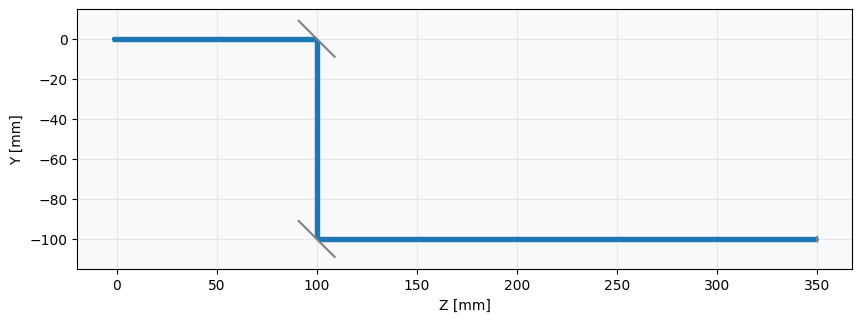

In [5]:
# -------------------------------
# Construct the Optical System Object
# -------------------------------
sys = OpticalSystem(
    beam_size = beam_size,
    wavelength = wavelength,
    mirror_aperture = mirror_aperture,
    pinhole_aperture = pinhole_aperture,
    detector_aperture = detector_aperture,
    mirror1_position=np.array([0.0, 0.0, 100.0]),
    mirror2_position=np.array([0.0, -100.0, 100.0]),
    rotation_angles_mirror1=np.array([np.pi/2+np.pi/4, 0.0, 0.0]),
    rotation_angles_mirror2=np.array([-np.pi/4, 0.0, 0.0]),
    pinhole_dist = 200,
    m2_a1_dist = 50,
)

# -------------------------------
# Validation and Visualization
# -------------------------------
if not sys.is_valid:
    print("Invalid Optical System!")
else:
    sys.draw(num_rays=5, reference="chief", distribution="uniform")


In [6]:
sys.draw3D(num_rays=5,reference="chief",distribution="uniform")

In [7]:
sys.info()

╒════╤═══════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar        │ Light     │      inf │         inf │ Air        │       0 │             1   │
│  1 │ Planar        │ Aperture  │      inf │         100 │ Air        │       0 │             1   │
│  2 │ Planar        │ Mirror1   │      inf │           0 │ Mirror     │       0 │            12.7 │
│  3 │ Planar        │ detector  │      inf │           0 │ Air        │       0 │             1   │
│  4 │ Planar        │ Mirror2   │      inf │          50 │ Mirror     │       0 │            12.7 │
│  5 │ Planar        │ Detector  │      inf │           0 │ Air        │       0 │             1   │
│  6 │ Planar        │ Aperture1 │      inf │           0 │ glass      │       0 │         

In [8]:
"""
╒════╤═══════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar        │ Light     │      inf │         inf │ Air        │       0 │             1   │
│  1 │ Planar        │ Aperture  │      inf │         100 │ Air        │       0 │             1   │
│  2 │ Planar        │ Mirror1   │      inf │           0 │ Mirror     │       0 │            12.7 │
│  3 │ Planar        │ detector  │      inf │           0 │ Air        │       0 │             1   │
│  4 │ Planar        │ Mirror2   │      inf │          50 │ Mirror     │       0 │            12.7 │
│  5 │ Planar        │ Detector  │      inf │           0 │ Air        │       0 │             1   │
│  6 │ Planar        │ Aperture1 │      inf │           0 │ glass      │       0 │             1   │
│  7 │ Planar        │ Aperture1 │      inf │         200 │ Air        │       0 │             1   │
│  8 │ Planar        │ Detector  │      inf │           0 │ Air        │       0 │             1   │
│  9 │ Planar        │ Aperture2 │      inf │           0 │ glass      │       0 │             1   │
│ 10 │ Stop - Planar │ Aperture2 │      inf │         nan │ Air        │       0 │             1   │
╘════╧═══════════════╧═══════════╧══════════╧═════════════╧════════════╧═════════╧═════════════════╛

From the info above, we can get the detector surfaces at index 3(on mirror2), 5(on pinhole1) and 8(on pinhole2),
That means you can see the irradiance maps on these three surfaces.
"""

'\n╒════╤═══════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕\n│    │ Type          │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │\n╞════╪═══════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡\n│  0 │ Planar        │ Light     │      inf │         inf │ Air        │       0 │             1   │\n│  1 │ Planar        │ Aperture  │      inf │         100 │ Air        │       0 │             1   │\n│  2 │ Planar        │ Mirror1   │      inf │           0 │ Mirror     │       0 │            12.7 │\n│  3 │ Planar        │ detector  │      inf │           0 │ Air        │       0 │             1   │\n│  4 │ Planar        │ Mirror2   │      inf │          50 │ Mirror     │       0 │            12.7 │\n│  5 │ Planar        │ Detector  │      inf │           0 │ Air        │       0 │             1   │\n│  6 │ Planar        │ Aperture1 │      inf │           0 │ glass      │       

d:\py\Anaconda3\envs\DiffOptics\lib\site-packages\optiland\backend\torch_backend.py:484: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen/native/BucketizationUtils.h:34.)
  ix = torch.searchsorted(x_centers, x, right=True) - 1


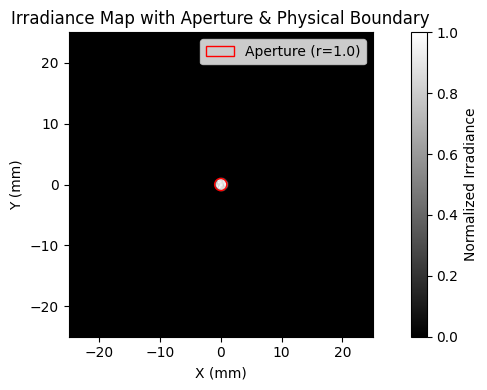

In [9]:
# visualize with pinhole aperture
irr_map, x_edges, y_edges, fig, ax,_ = compute_irr_with_aperture_viz(
    sys,
    detector_surface=5,
    aperture_radius=radius,
    show_plot=True,
    linewidth=1,
    img_transpose=False
)
plt.show()

In [10]:
# Compute power based on the detector surfaces, in this function, we add the mask to compute the power within the pinhole area
p1_ideal = compute_power(sys,detector_surface=detector_surface1,num_rays=num_rays,radius=radius,res=res)
p2_ideal = compute_power(sys,detector_surface=detector_surface2,num_rays=num_rays,radius=radius,res=res)
print(p1_ideal)
print(p2_ideal)


tensor(973.6755, grad_fn=<MulBackward0>)
tensor(973.6755, grad_fn=<MulBackward0>)


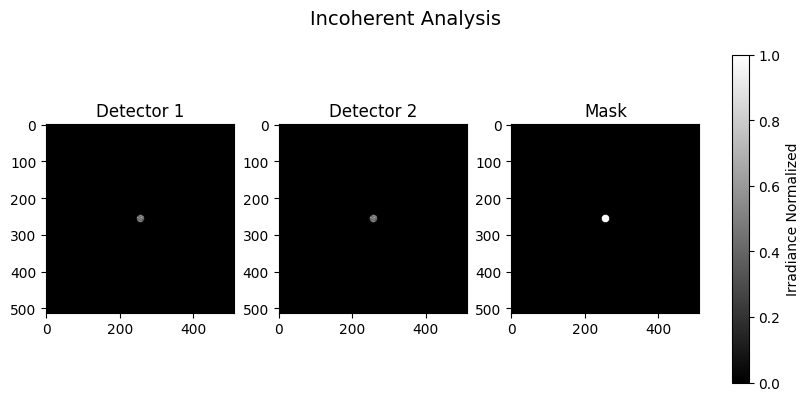

In [11]:
# Compute_irr_in_mask means you can only see the irradiance within the pinhole area
ideal_map1_draw,mask= compute_irr_in_mask(sys,detector_surface=detector_surface1,num_rays=num_rays,radius=radius,res=res)
# Compute_irr means you can see the full irradiance map on the detector
ideal_map2_draw = compute_irr(sys,detector_surface=detector_surface2,num_rays=num_rays,res=res)
ideal_map1_numpy = ideal_map1_draw.detach().cpu().numpy()
ideal_map2_numpy = ideal_map2_draw.detach().cpu().numpy()
mask = mask.detach().cpu().numpy()

vmin, vmax = 0, 1
plt.figure(figsize=(8, 4), constrained_layout=True)

# sub plot 1
plt.subplot(1, 3, 1)
im = plt.imshow(ideal_map1_numpy, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Detector 1")

# subplot 2
plt.subplot(1, 3, 2)
plt.imshow(ideal_map2_numpy, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Detector 2")

plt.subplot(1, 3, 3)
plt.imshow(mask, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Mask")

fig = plt.gcf()
cbar = fig.colorbar(im, ax=fig.axes, orientation="vertical", shrink=0.9)
cbar.set_label("Irradiance Normalized")

fig.suptitle("Incoherent Analysis", fontsize=14)

plt.show()




(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

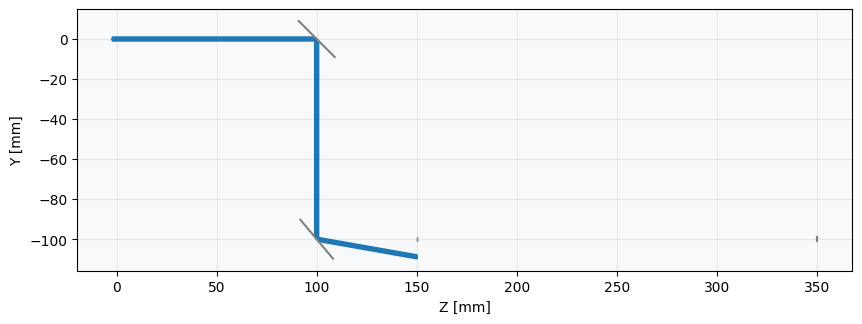

In [12]:
# Set mirror angles, should be in radians
rx1 = np.deg2rad(180-45)
ry1 = np.deg2rad(0)
rx2 = np.deg2rad(-40)
ry2 = np.deg2rad(0)
sys.set_mirror_angle(rx1=rx1, ry1=ry1, rx2=rx2, ry2=ry2, gradient=True)
sys.draw(num_rays=5,reference="chief",distribution="uniform")


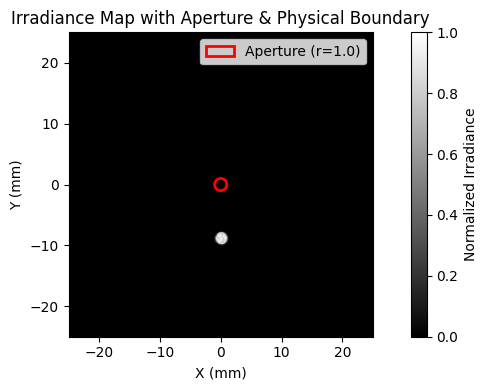

In [13]:
# visualize with pinhole aperture
irr_map, x_edges, y_edges, fig, ax,_ = compute_irr_with_aperture_viz(
    sys,
    detector_surface=5,
    aperture_radius=radius,
    show_plot=True,
    linewidth=2,
    img_transpose=False
)
plt.show()

In [14]:
x,y=get_detector_edges(detector_size=detector_aperture)
dx, dy, _ = spot_centroid_from_irr(irr_map, x_edges, y_edges)
print(f"Spot centroid at detector surface 5: x={dx:.4f}, y={dy:.4f}")

Spot centroid at detector surface 5: x=-0.0025, y=-8.8110


In [15]:
# Optimized parameters
params = [
    sys.surface_group.surfaces[2].geometry.cs.rx,
    sys.surface_group.surfaces[2].geometry.cs.ry,
    sys.surface_group.surfaces[4].geometry.cs.rx,
    sys.surface_group.surfaces[4].geometry.cs.ry,
]
print(params[0],params[1],params[2],params[3])

tensor(2.3562, requires_grad=True) tensor(0., requires_grad=True) tensor(-0.6981, requires_grad=True) tensor(0., requires_grad=True)
